- Analysis of transfer dataset regarding teacher predictive distribution
- Example visualisations of teacher uncertainty, epistemic and aleatoric uncertainty for example sequences 

Goals:
- Validate that transfer dataset indeed incorporates teacher uncertainty (the approach works)

In [1]:
import pandas as pd

In [4]:
path_to_transfer_dataset = "../../../tests/distribution_distillation/transfer_data/aleatoric/transfer_train.csv"

transfer_df = pd.read_csv(path_to_transfer_dataset, sep="\t")

In [10]:
transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sequences    10000 non-null  object 
 1   labels       10000 non-null  int64  
 2   predictions  10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [5]:
transfer_df.head()

,sequences,labels,predictions
0,burritos are trash,0,0.509875
1,<user> yeah man he even scare me and i is a ni...,1,0.284086
2,rt <user> <user> <url> <emoji> we gave bitches...,1,0.409976
3,<user> ah lil bit bitch <emoji> <emoji> <emoji...,1,0.000000
4,<user> yeah some niggas are straight bitches,1,0.316041


In [18]:
# group by sequence, compute mean and std of teacher predictions
teacher_mean = transfer_df.groupby("sequences")['predictions'].mean()
teacher_std = transfer_df.groupby("sequences")['predictions'].std()
teacher_description = pd.concat([teacher_mean, teacher_std], axis=1)
teacher_description.columns = ["pred_mean", "pred_std_dev"]

In [19]:
teacher_description

,pred_mean,pred_std_dev
sequences,,
<emoji> rt <user> id rather be called nigger than a uncle tom or a mark,0.530539,0.350839
<emoji> rt <user> they recruited buku fags in here <emoji> a warehouse is no place for them <emoji>,0.566472,0.279380
<emoji> ugly bitches get no love,0.430416,0.147259
get some head off twitter now niggahs thats bracken ima baby momma killa yo bitch she can get it you <url>,0.322670,0.276886
<hashtag> n p shy glizzy awwsome remix feat <number> chainz aap rocky via <user> <url>,0.441177,0.286804
...,...,...
yellow jackets at gas station trash cans are the worst,0.632294,0.301067
you got niggas and i got bitches partynextdoor aint never lied,0.501746,0.348666
you just caught this bitch cheatin while you at work shes with some dude tryin to get off fuck slittin her throat cut this bitchs head off,0.335971,0.357032


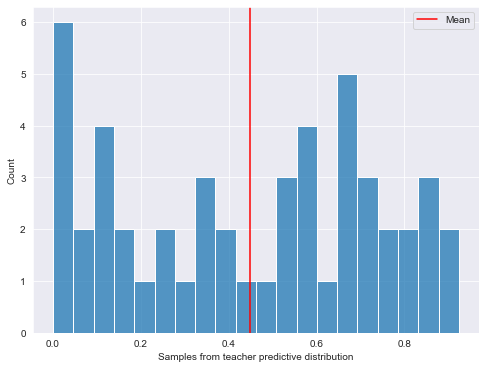

In [66]:
# pick random sequence, plot all raw predictions for this sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

random_sequence = np.random.choice(teacher_description.index)
random_sequence_df = transfer_df[transfer_df["sequences"] == random_sequence]

random_seq_mean, random_seq_std_dev  = teacher_description.loc[random_sequence, :]["pred_mean"], teacher_description.loc[random_sequence]["pred_std_dev"]

plt.figure(figsize=(8, 6))
sns.histplot(random_sequence_df["predictions"], bins=20)
plt.axvline(random_seq_mean, color="red", label="Mean")
plt.xlabel("Samples from teacher predictive distribution")
plt.legend();